<a href="https://colab.research.google.com/github/a72572993/samurai-finalkadai/blob/main/SAMURAI%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C_2_AkaneYoshida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最終課題
https://drive.google.com/file/d/1TJibi0yvD1h7aO_LZXI_cn2wd_PoRxmc/view



エゾバフンウニの漁獲量を時系列分析で予測する

https://www.pref.hokkaido.lg.jp/sr/sum/03kanrig/sui-toukei/suitoukei.html

https://www.jma-net.go.jp/sapporo/kaiyou/engan/data/engandata.html

1. 課題把握とゴールの設定
2. 必要なライブラリのインポート
3. データの準備
4. 予測モデルの学習
5. 予測
6. 予測の評価
7. 設定したゴールの回答


1. 課題把握とゴールの設定

【課題】
エゾバフンウニの漁獲量減少について

毎年ふるさと納税で、北海道のエゾバフンウニを購入していますが、2024年は漁獲量が少ないとのことで例年より1か月遅く納品されました。
年々進む地球温暖化に伴い海産物の漁獲量に異変が生じているように感じているため、北海道の過去のエゾバフンウニの漁獲量をもとに時系列分析で未来の漁獲量を予測し、来年のふるさと納税もエゾバフンウニを購入するかを決めたいと思いました。


In [65]:
#2. 必要なライブラリのインポート
import pandas as pd
import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt


In [70]:
#3. データの準備
df = pd.read_csv('/content/data_uni.csv')
df


,ds,y
0,1985/01/01,819
1,1986/01/01,820
2,1987/01/01,792
3,1988/01/01,795
4,1989/01/01,667
5,1990/01/01,624
6,1991/01/01,397
7,1992/01/01,326
8,1993/01/01,403
9,1994/01/01,432


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      37 non-null     object
 1   y       37 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


<Axes: xlabel='ds', ylabel='y'>

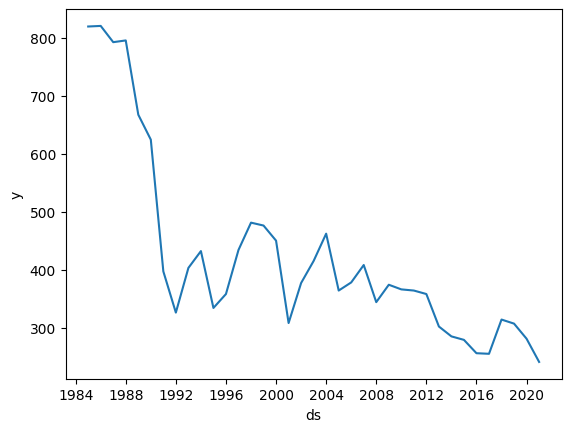

In [68]:
#エゾバフンウニウニの漁獲量推移を可視化
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])


In [69]:
#4．予測モデルの学習

#Prophetクラスをインポートし、インスタンス化
from prophet import Prophet
model = Prophet()

#学習
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsslard2a/mxttpboi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsslard2a/ibs9jaa_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76856', 'data', 'file=/tmp/tmpsslard2a/mxttpboi.json', 'init=/tmp/tmpsslard2a/ibs9jaa_.json', 'output', 'file=/tmp/tmpsslard2a/prophet_modelso7960qc/prophet_model-20240813034921.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:49:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:49:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:
#5．予測

#向こう4年という枠組みで予測したいため、periodsパラメータに4、freqパラメータにYSを指定
future = model.make_future_dataframe(periods=4, freq='YS')
future


,ds
0,1985-01-01
1,1986-01-01
2,1987-01-01
3,1988-01-01
4,1989-01-01
5,1990-01-01
6,1991-01-01
7,1992-01-01
8,1993-01-01
9,1994-01-01


In [54]:
#predictメソッドで予測
forecast = model.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1985-01-01,-109.024740,507.943942,760.805507,-109.024740,-109.024740,745.724021,745.724021,745.724021,745.724021,745.724021,745.724021,0.0,0.0,0.0,636.699281
1,1986-01-01,-120.787100,498.582765,752.803440,-120.787100,-120.787100,746.405574,746.405574,746.405574,746.405574,746.405574,746.405574,0.0,0.0,0.0,625.618474
2,1987-01-01,-132.549461,487.544760,735.029004,-132.549461,-132.549461,743.977425,743.977425,743.977425,743.977425,743.977425,743.977425,0.0,0.0,0.0,611.427964
3,1988-01-01,-144.311821,470.135432,728.243083,-144.311821,-144.311821,738.442928,738.442928,738.442928,738.442928,738.442928,738.442928,0.0,0.0,0.0,594.131107
4,1989-01-01,-156.106407,464.303587,712.732508,-156.106407,-156.106407,745.724021,745.724021,745.724021,745.724021,745.724021,745.724021,0.0,0.0,0.0,589.617614
5,1990-01-01,-167.868767,456.908153,707.765661,-167.868767,-167.868767,746.405574,746.405574,746.405574,746.405574,746.405574,746.405574,0.0,0.0,0.0,578.536807
6,1991-01-01,-179.631128,439.850512,685.913199,-179.631128,-179.631128,743.977425,743.977425,743.977425,743.977425,743.977425,743.977425,0.0,0.0,0.0,564.346297
7,1992-01-01,-191.393488,414.344618,677.597101,-191.393488,-191.393488,738.442928,738.442928,738.442928,738.442928,738.442928,738.442928,0.0,0.0,0.0,547.049440
8,1993-01-01,-203.188073,428.260531,670.298870,-203.188073,-203.188073,745.724021,745.724021,745.724021,745.724021,745.724021,745.724021,0.0,0.0,0.0,542.535947
9,1994-01-01,-214.948898,398.137384,657.988784,-214.948898,-214.948898,746.405574,746.405574,746.405574,746.405574,746.405574,746.405574,0.0,0.0,0.0,531.456676


In [55]:
#予測したい項目を抽出
# ds	日付
# yhat	エゾバフンウニ漁獲量の予測値
# yhat_lower	予測値の不確実性区間の下限
# yhat_upper	予測値の不確実性区間の上限

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,1985-01-01,636.699281,507.943942,760.805507
1,1986-01-01,625.618474,498.582765,752.803440
2,1987-01-01,611.427964,487.544760,735.029004
3,1988-01-01,594.131107,470.135432,728.243083
4,1989-01-01,589.617614,464.303587,712.732508
5,1990-01-01,578.536807,456.908153,707.765661
6,1991-01-01,564.346297,439.850512,685.913199
7,1992-01-01,547.049440,414.344618,677.597101
8,1993-01-01,542.535947,428.260531,670.298870
9,1994-01-01,531.456676,398.137384,657.988784


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


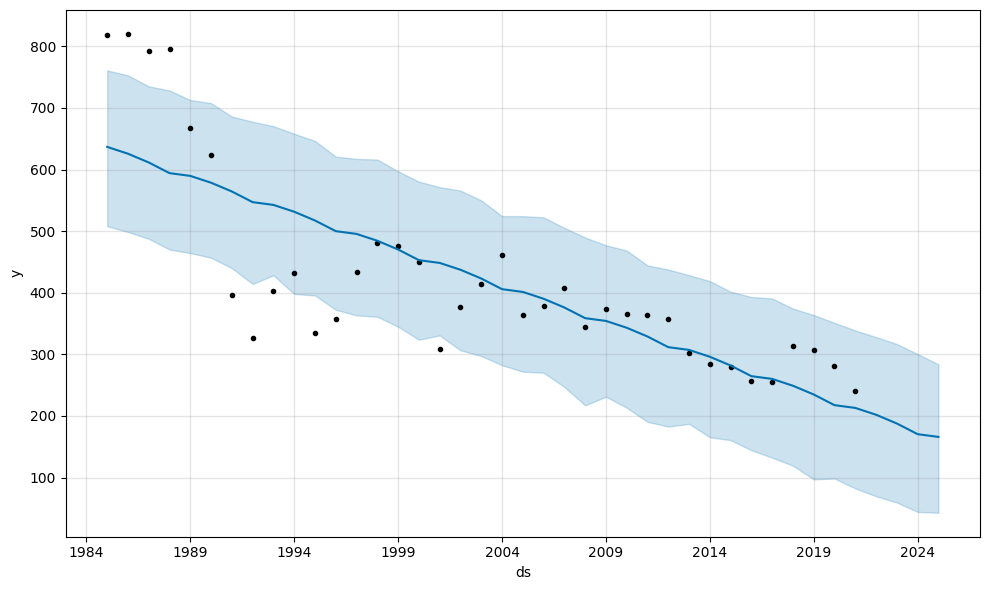

In [56]:
#予測を可視化
fig_forecast = model.plot(forecast)


In [71]:
#6. 予測の評価
#過去のデータから学習データとテストデータを取得し、学習データで予測モデルを学習
#テストデータの実際の値と、予測モデルによる予測値の誤差にもとづく評価が可能
#cutoffs:いつまでのデータを学習データとするかという期限の日付
#cutoffsを2014/12/1, 2015/12/1, 2016/12/1, 2017/12/1、horizonを4年とした場合

cutoffs = pd.to_datetime(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01'])


In [58]:
#テストパターンを作成するcross_validation関数をインポート
from prophet.diagnostics import cross_validation


In [59]:
#horizon	cutoffs翌日以降のテスト期間
#うるう年も考慮し、365日×4+1日 = 1461日
df_cv = cross_validation(model, horizon = '1461days', cutoffs=cutoffs)


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsslard2a/e1_jdl0h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsslard2a/jw3fdupy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=497', 'data', 'file=/tmp/tmpsslard2a/e1_jdl0h.json', 'init=/tmp/tmpsslard2a/jw3fdupy.json', 'output', 'file=/tmp/tmpsslard2a/prophet_model3ut0p6el/prophet_model-20240813034918.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsslard2a/veyrd41l.json
DEBUG:cmdstanpy:input tempfile

In [60]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-01,245.025093,109.613087,380.615916,279,2014-01-01
1,2016-01-01,225.337466,84.540435,362.028848,256,2014-01-01
2,2017-01-01,222.993598,87.534615,347.931973,255,2014-01-01
3,2018-01-01,207.910559,87.922610,345.979055,314,2014-01-01
4,2016-01-01,230.660610,103.022143,368.451099,256,2015-01-01
5,2017-01-01,227.330027,88.716797,355.411829,255,2015-01-01
6,2018-01-01,213.237349,79.306669,349.439873,314,2015-01-01
7,2019-01-01,196.493947,56.591892,332.611074,307,2015-01-01
8,2017-01-01,228.620774,101.047781,361.782866,255,2016-01-01
9,2018-01-01,215.247761,86.612378,351.125298,314,2016-01-01


In [61]:
#評価指標を算出するperformance_metrics関数をインポート
from prophet.diagnostics import performance_metrics

#引数にdf_cvを指定して、performance_metrics関数を実行
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,3590.970626,59.924708,51.352955,0.174163,0.121774,0.196383,1.0
1,366 days,695.863568,26.379226,26.379226,0.103448,0.103448,0.109091,1.0
2,730 days,5913.075002,76.896521,67.499167,0.229816,0.229816,0.268418,1.0
3,731 days,5258.816044,72.517695,63.211106,0.211504,0.211504,0.243957,1.0
4,1095 days,9449.099716,97.206480,97.206480,0.345931,0.345931,0.418278,1.0


In [62]:
#horizon列を月単位で表示し、新たな行の構成で各評価指標を算出
#performance_metrics関数の実行時に、monthlyパラメータにTrueを指定して、horizon列を月単位で表
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,12,2867.193862,53.546184,45.109522,0.156485,0.112611,0.174560,1.0
1,24,5585.945523,74.739183,65.355136,0.220660,0.217137,0.256187,1.0
2,36,8050.126509,89.722497,84.389381,0.285694,0.333415,0.339825,1.0
3,48,9257.298906,96.214858,94.093478,0.325453,0.346628,0.390395,1.0


<Axes: xlabel='horizon', ylabel='mse'>

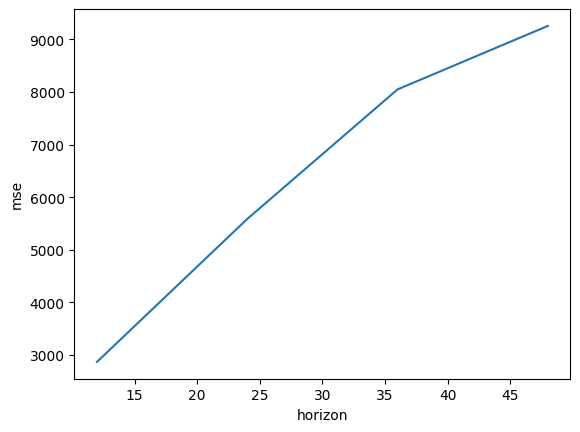

In [63]:
#seabornのlineplot関数を活用し、実際の値と予測値の平均二乗誤差であるmseの推移を可視化

sns.lineplot(x='horizon', y='mse', data=df_p)


<Axes: xlabel='horizon', ylabel='coverage'>

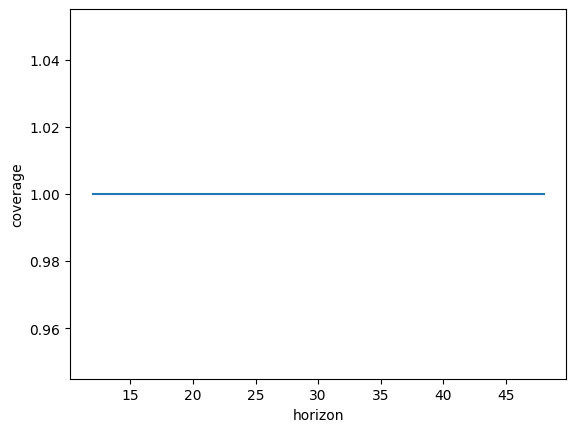

In [64]:
#不確実性区間に予測値が含まれている割合であるcoverageも、推移を可視化
sns.lineplot(x='horizon', y='coverage', data=df_p)


7. 設定したゴールの回答

向こう4年の漁獲量は、減少傾向にありつつも変化が少ないように感じるが、不確実性区間に実際の値が含まれる割合が100%である点、あてにならない分析結果と思われます。
年間漁獲量を強引に日割りにしたデータを使用したことが問題と思うため、勉強して年間の数量から分析する方法を身につけたいと思いました。

とはいえ、「向こう4年の漁獲量の変化が少ない」という自分の分析結果を信じて、引き続き来年のふるさと納税もエゾバフンウニを購入したいと思います。
